In [3]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc


import sys
sys.path.append("/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/functions/")
#import pylattice.functions.InterfaceChimeraX as icx
import InterfaceChimeraX as icx
import TiffProcessing as tiffproc

In [4]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'


filepath = path+'_inputParameters.csv'
print(filepath)
inputParameters = pd.read_csv(filepath,names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")


slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))



/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/_inputParameters.csv


In [6]:
filepath = path +outputDataFolder+'/'+trackingCsvFilename
print(filepath)
data = pd.read_csv(filepath,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]

dataUnique = data.drop_duplicates(subset='trackId')

longTracks = data[data['tracklength'] > 5]
longTracks

print("total number of tracks: {}\nunique tracks: {}\nlongtracks (len>5) {}".format(len(data),len(dataUnique),len(longTracks.drop_duplicates(subset='trackId'))))

/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/trackedFeatures.csv
total number of tracks: 1728
unique tracks: 484
longtracks (len>5) 94


In [7]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 85.14212,  85.17322,  84.91228,  84.84986,  84.54557,  84.60089,
        84.28947,  84.53493,  85.23635,  84.73927])

Text(0,0.5,'amplitude')

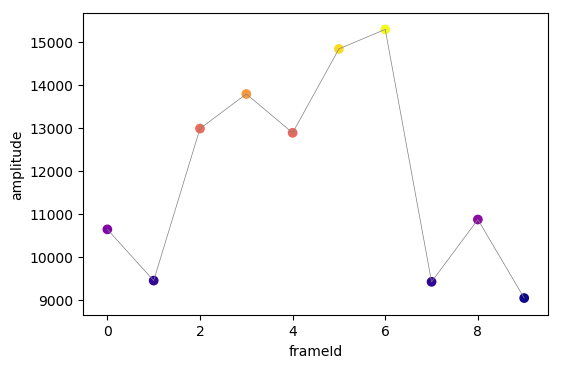

In [8]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


Text(0.5,0,'z [px]')

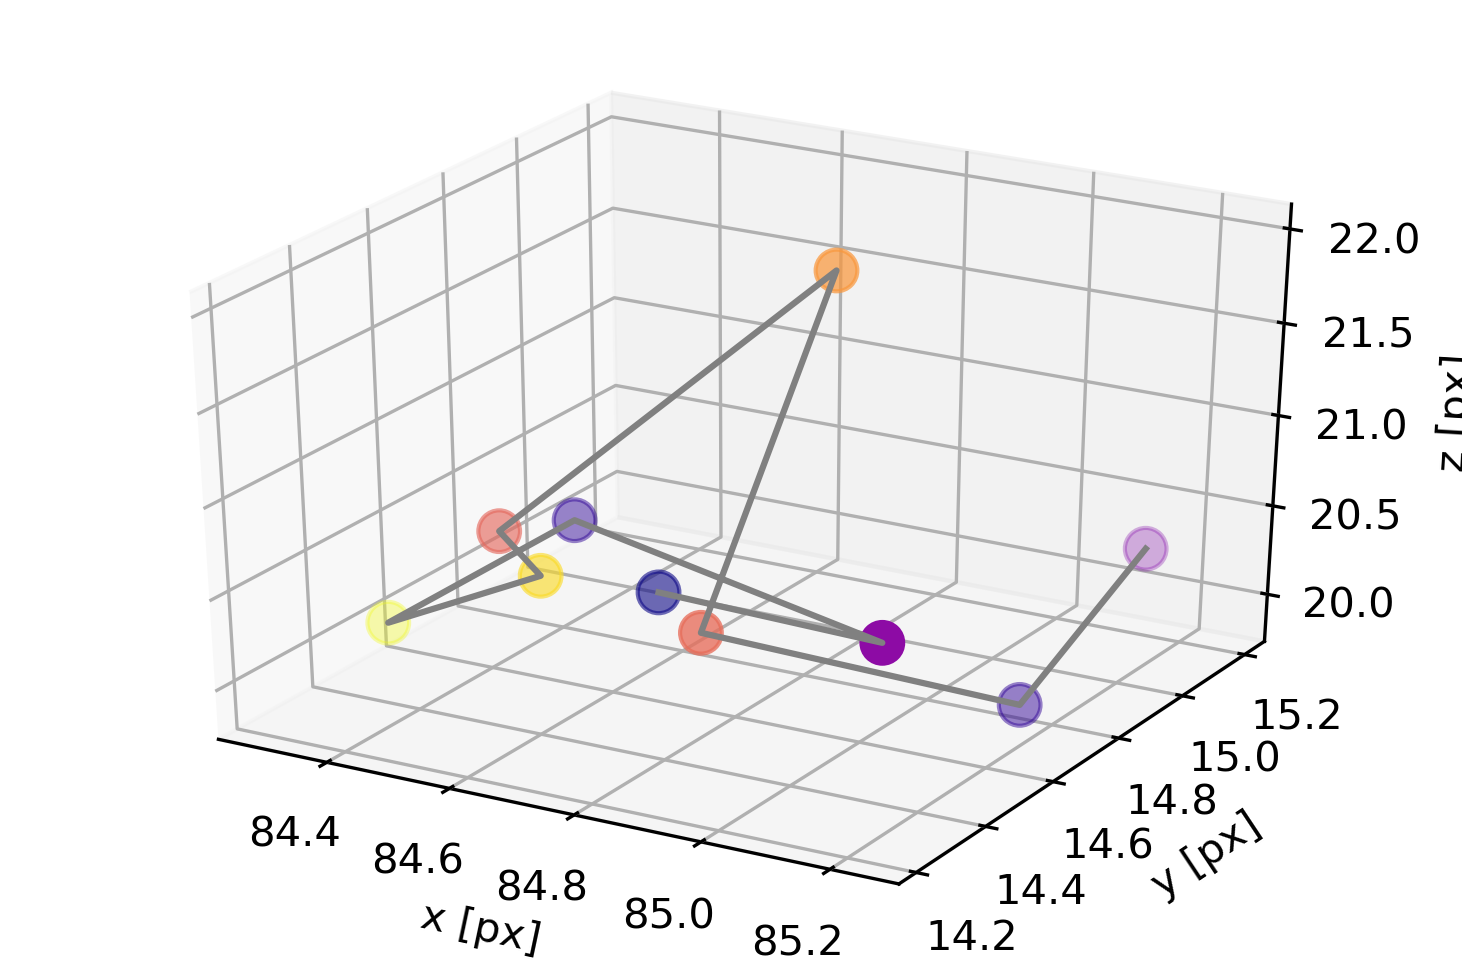

In [9]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)
ax.plot3D(x, y, z, 'grey')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap='plasma',s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
ax.set_zlabel('z [px]')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


cmap_green = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'darkgreen'),
                                                          (0.5, 'lime'),
                                                    (1.0, 'aquamarine')]
                                        )

cmap_magenta = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'purple'),
                                                          (0.5, 'magenta'),
                                                    (1.0, 'pink')]
                                        )


cmap_red = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'maroon'),
                                                          (0.5, 'red'),
                                                    (1.0, 'orange')]
                                        )

Text(0.5,0,'y [px]')

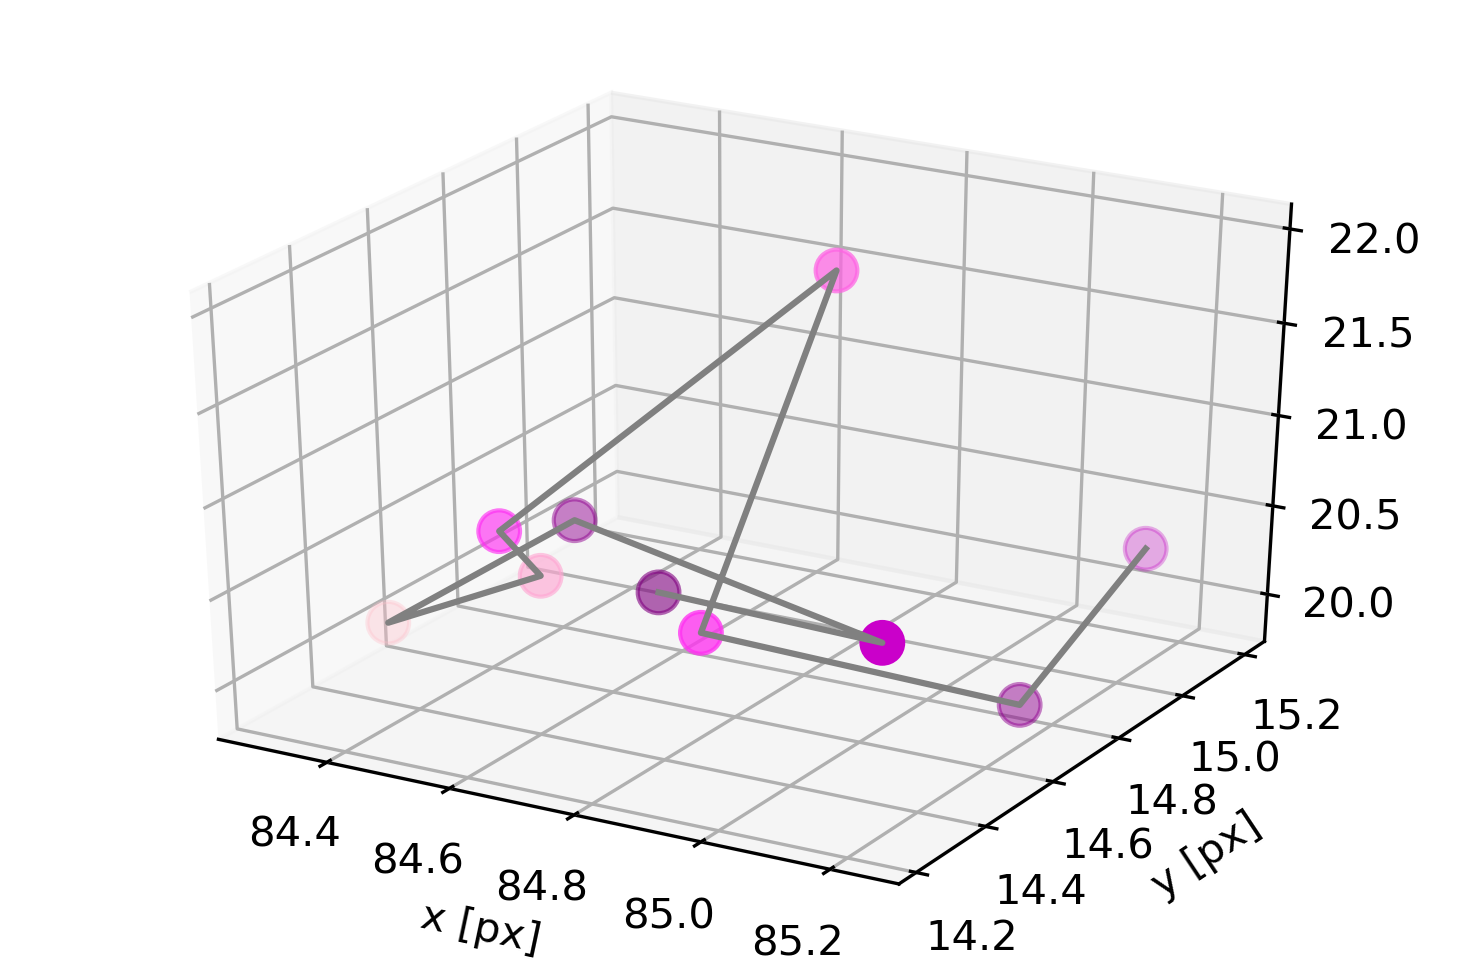

In [18]:
trackID = 8
track = data[data['trackId'] == trackID]

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)


plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'grey')
# Data for three-dimensional scattered points
ax.scatter3D(x, y, z,c=intensity, cmap=cmap_magenta,s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.zlabel('z [px]')

Text(0.5,0,'z [px]')

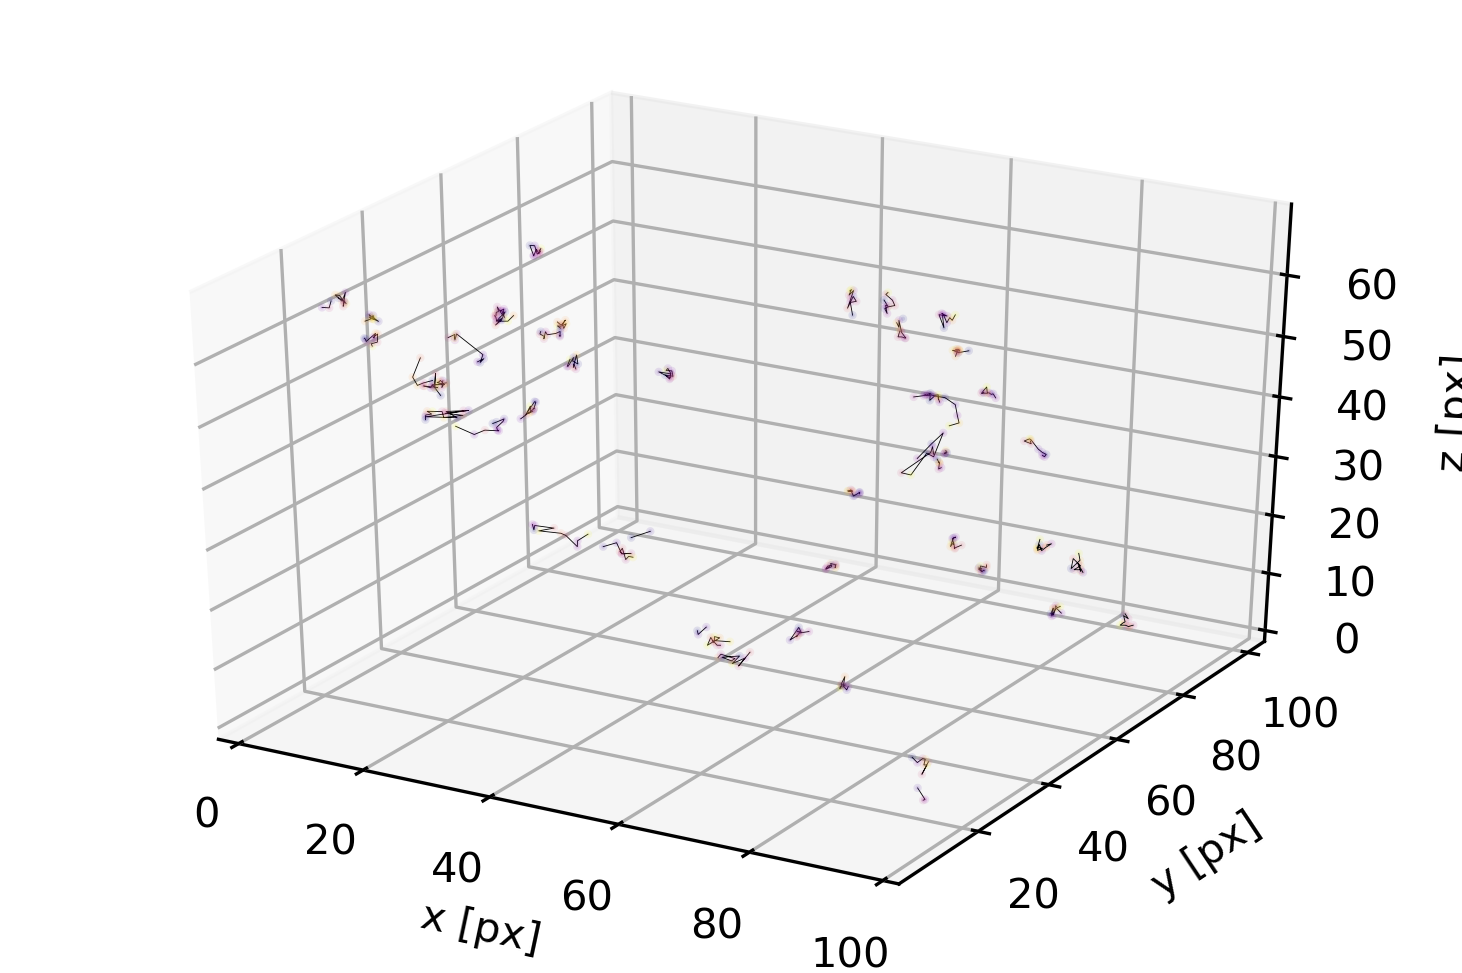

In [14]:

longtracks = data[data['tracklength'] >= 10]

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.1);

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_zlabel('z [px]')